## **[1] 이미지 데이터 접근하기**

1.1 구글 드라이브에 이미지 폴더 업로드하기

1.2 구글 드라이브 이미지 폴더 접근하기

In [1]:
# Google Colaboratory에서 Google Drive에 접근하는데 사용함
from google.colab import drive

# Google Drive를 /content/gdrive 디렉토리에 접근함
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#  현재 작업 디렉토리를 /content/gdrive/My Drive/data/fruit_dataset/ 디렉토리로 변경함
%cd /content/gdrive/My Drive/data/fruit_dataset/

/content/gdrive/My Drive/data/fruit_dataset


## **[2] 이미지 데이터 전처리하기**

2.1 훈련 이미지 데이터 전처리하기

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator를 생성함. (이미지 픽셀값을 0~1사이 범위로 조정)
train_datagen = ImageDataGenerator(rescale = 1./255)

# 주어진 폴더(train)에서 이미지 데이터를 불러와 전처리를 적용함.
training_set  = train_datagen.flow_from_directory('train',      #이미지 훈련 데이터 폴더명
                                   target_size = (64, 64),   # 이미지 크기 조정
                                   batch_size = 32,        # 한번에 32개 이미지 샘플수
                                   shuffle = True,        # 훈련 이미지 순서 섞음
                                   class_mode = 'categorical')  # 다중 클래스 모드

Found 400 images belonging to 2 classes.


2.2 테스트 이미지 데이터 전처리하기

In [4]:
# ImageDataGenerator를 생성함. (이미지 픽셀값을 0~1사이 범위로 조정)
test_datagen = ImageDataGenerator(rescale = 1./255)

# 주어진 폴더(test)에서 이미지 데이터를 불러와 전처리를 적용함.
test_set = test_datagen.flow_from_directory('test',     # 이미지 테스트 데이터 폴더명
                                 target_size=(64, 64),  # 이미지 크기 조정
                                 shuffle = False,      # 테스트 이미지 순서 안바꿈
                                 class_mode='categorical')  # 다중 클래스 라벨

Found 40 images belonging to 2 classes.


## **[3] 합성곱 신경망 모델 생성하기**

3.1 훈련 이미지 데이터 특징 추출하기

In [5]:
from keras.applications.vgg16 import VGG16

# vgg 모델 생성하기
vgg = VGG16(include_top=False, weights='imagenet', input_shape=(64, 64, 3))
vgg.summary()

for layer in vgg.layers:
    layer.trainable = False

58889256/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

3.2 완전 연결 계층으로 분류모델 설계하기

In [6]:
from keras.models import Sequential     # keras.model의 Sequential 불러오기
from keras.layers import Dense, Flatten, Input # keras.layers의 Dense 불러오기

In [7]:
model = Sequential()                       # 모델을 생성함
model.add(Input(shape=(64,64,3)))
model.add(vgg)                             # vgg 모델 추가함
model.add(Flatten())                       # 1차원 배열로 바꿈
model.add(Dense(64, activation='relu'))    # 은닉층 추가함
model.add(Dense(2, activation='softmax'))  # 출력층 추가함
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 14845954 (56.63 MB)
Trainable params: 131266 (512.76 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


3.3 분류 모델 환경 설정하기

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

3.4 합성곱 신경망 모델 학습하기

In [9]:
history = model.fit(training_set, epochs=10)

Epoch 1/10
13/13 [==============================] - 108s 8s/step - loss: 0.6073 - accuracy: 0.6850
Epoch 2/10
13/13 [==============================] - 3s 227ms/step - loss: 0.3513 - accuracy: 0.8425
Epoch 3/10
13/13 [==============================] - 3s 233ms/step - loss: 0.2480 - accuracy: 0.9100
Epoch 4/10
13/13 [==============================] - 3s 262ms/step - loss: 0.2179 - accuracy: 0.9075
Epoch 5/10
13/13 [==============================] - 3s 225ms/step - loss: 0.1743 - accuracy: 0.9425
Epoch 6/10
13/13 [==============================] - 3s 227ms/step - loss: 0.1425 - accuracy: 0.9525
Epoch 7/10
13/13 [==============================] - 3s 233ms/step - loss: 0.1300 - accuracy: 0.9550
Epoch 8/10
13/13 [==============================] - 4s 271ms/step - loss: 0.1108 - accuracy: 0.9650
Epoch 9/10
13/13 [==============================] - 3s 226ms/step - loss: 0.0963 - accuracy: 0.9775
Epoch 10/10
13/13 [==============================] - 3s 237ms/step - loss: 0.0890 - accuracy: 0.9700


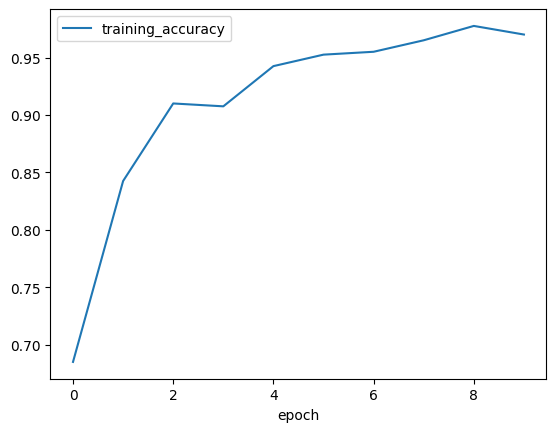

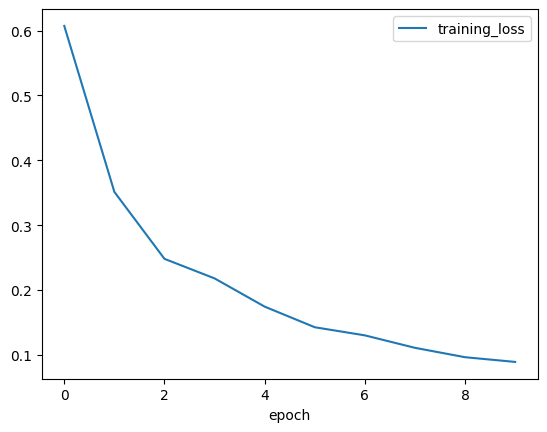

In [10]:
# 정확도(accuracy), 손실(loss) 그래프로 표현
import matplotlib.pyplot as plt

plt.xlabel('epoch')
plt.plot(history.history['accuracy'], label='training_accuracy')
plt.legend()
plt.show()


plt.xlabel('epoch')
plt.plot(history.history['loss'], label='training_loss')
plt.legend()
plt.show()

## **[4] 합성곱 신경망 모델 평가 및 예측하기**

4.1 모델 평가하기

In [11]:
model.evaluate(test_set)

2/2 [==============================] - 6s 5s/step - loss: 0.1996 - accuracy: 0.9500


[0.19962778687477112, 0.949999988079071]

4.2 예측하기

In [12]:
test_set.class_indices

{'freshapples': 0, 'rottenapples': 1}

In [13]:
predictions = model.predict(test_set)
predictions

2/2 [==============================] - 1s 75ms/step


array([[9.9994659e-01, 5.3445136e-05],
       [9.9746007e-01, 2.5399169e-03],
       [9.4001579e-01, 5.9984241e-02],
       [9.9992514e-01, 7.4829812e-05],
       [9.9986100e-01, 1.3898914e-04],
       [9.9985135e-01, 1.4860903e-04],
       [8.4341085e-01, 1.5658921e-01],
       [9.9993646e-01, 6.3572428e-05],
       [9.9984431e-01, 1.5564480e-04],
       [7.7500904e-01, 2.2499095e-01],
       [9.9824750e-01, 1.7525461e-03],
       [9.9367791e-01, 6.3220402e-03],
       [9.9874616e-01, 1.2537726e-03],
       [9.5525229e-01, 4.4747677e-02],
       [9.9855989e-01, 1.4400703e-03],
       [9.9973279e-01, 2.6722663e-04],
       [9.9931431e-01, 6.8571616e-04],
       [9.9966836e-01, 3.3159269e-04],
       [9.5614725e-01, 4.3852720e-02],
       [9.9833184e-01, 1.6681220e-03],
       [2.0460790e-01, 7.9539210e-01],
       [4.2350140e-01, 5.7649857e-01],
       [7.2106302e-01, 2.7893698e-01],
       [1.8649140e-02, 9.8135090e-01],
       [4.1887280e-02, 9.5811266e-01],
       [5.4518003e-02, 9.

In [14]:
import numpy as np
print(np.argmax(predictions, axis=1))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1]


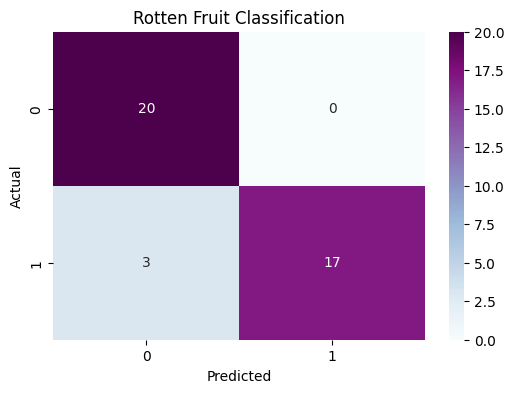

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix  # 혼동행렬 함수를 불러옴

# 예측결과에서 가장 큰 값의 인덱스를 추출함
prediction = np.argmax(predictions, axis=1)
truth =  test_set.labels   # 테스트 데이터의 실제 레이블을 가져옴

# 혼동행렬을 계산함 (실제값, 예측값)
conf = confusion_matrix(truth, prediction)

# 혼동행렬을 표시함
plt.figure(figsize=(6, 4))  # 그림 크기 설정함
sns.heatmap(conf, annot=True, cmap="BuPu")

# 제목, x축 이름(Prediction), y축 이름(Truth)을 설정함
plt.title("Rotten Fruit Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()